<a href="https://colab.research.google.com/github/Yang88888888888/regressionproject/blob/main/GA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Assignment - Part 2
Topic: **Global Insights into Missing Migrants**

# Global Insights into Missing Migrants


**Author**
* Khairunnissa Zainuddin (22098733)
*Fatihah Atikah (17100287)
*Tan Kai Qi (23051355)
*Seh Chia Shin (17202838)
*Lim Cheng Yang (22100811)


## Determine business objectives


**Background, overview and motivation:**
<h5>
The global phenomenon of missing migrants is a complex and pressing issue that demands thorough investigation and understanding. Forced or voluntary migration has become a ubiquitous feature of the modern world, fueled by variables like environmental shifts, economic inequality, and violence. Unfortunately, this migratory flow is accompanied by a disturbing trend, the disappearance of migrants during their journey.

One major knowledge gap about the difficulties experienced by disadvantaged people in transit is the lack of thorough study on missing migrants. Although media reporting and evidence can provide insight into specific situations, a thorough investigation is crucial to fully grasp the challenging factors that contribute to this phenomenon.

</h5>

**Business objective:**

<h5>To conduct a comprehensive analysis to explore the relationships among various factors contributing to the phenomenon of missing migrants</h5>

**Business success criteria:**
<h5>Create a web app that enable user to view and explore the pattern of missing migrants based on, temporal, demographic and geospatial variables</h5>


**Business goals:**
* Develop predictive models that can forecase the number of missing migrants in the upcoming years
* Identify and address the possible cause of missing migrants within specific demographic groups.
* Increase awareness and implement safety measure in regions that experience higher rates of missing migrants for early prevention


##Data Understanding


In [ ]:
#Import dataset into Colab
from google.colab import files

uploaded = files.upload() #<- REMINDER: Need to upload the dataset before running the code below

Saving Global Missing Migrants Dataset.csv to Global Missing Migrants Dataset.csv


In [ ]:
#Convert dataset into dataframe using Pandas
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Migrants.csv']))
df.head()

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America
3,Incident,2014,January,Central America,North America,Mexico,1.0,0,1,0,0,1,0,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America
4,Incident,2014,January,Northern Africa,Europe,Sudan,1.0,0,1,2,0,1,0,Harsh environmental conditions / lack of adequ...,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe


The collected contains 19 variables and the description of each column are as below:

1. Incident Type: Type of migration incident
2. Incident Year: Year when the incident occured
3. Reported Month: Month when the incident occured
4. Region of Origin: Region from which the migrants originated
5. Region of Incident: Region where the incident occured
6. Country of Origin: Country from which the migrants originated
7. Number of Dead: Number of confirmed deceased migrants
8. Minimum Estimated Number of Missing: Minimum estimated count of missing migrants
9. Total Number of Dead and Missing:
10. Number of Survivors: Number of migrants who survived the incident
11. Number of Females: Number of female migrants involved
12. Number of Males: Number of male migrants involved
13. Number of Children:Number of children migrants involved
14. Cause of Death: Cause of death for migrants
15. Migration route: Route taken by migrants during their journey
16. Location of Death: Approximate location where the incident occured
17. Information Source: Source of information about the incident
18. Coordinates: Coordinates of the incident location
19. UNSD Geographical Grouping: Geographical grouping according to the United Nations Statistics Divison



Check the total number of rows in the dataset. An important to conduct comparison for rows with missing values in order to determine later on whether the rows should be dropped or the missing values will be replaced by 'NULL'.

In [ ]:
len(df)

13020

Check for the columns that contained missing values and the number of rows with the missing values to make sure that it is not more than 50% of the dataset.

In [ ]:
cols_no_na = df.columns[df.isna().sum(axis=0) == 0]
print("Columns with no missing value:")
list(cols_no_na)

Columns with no missing value:


['Incident Type',
 'Incident year',
 'Reported Month',
 'Region of Incident',
 'Minimum Estimated Number of Missing',
 'Total Number of Dead and Missing',
 'Number of Survivors',
 'Number of Females',
 'Number of Males',
 'Number of Children',
 'Cause of Death',
 'Location of death']

In [ ]:
cols_with_na = df.columns[df.isna().sum(axis=0) > 0]
print("Columns with missing values:")
list(cols_with_na)

Columns with missing values:


['Region of Origin',
 'Country of Origin',
 'Number of Dead',
 'Migration route',
 'Information Source',
 'Coordinates',
 'UNSD Geographical Grouping']

In [ ]:
#Check for the number of rows with missing values
df[df.isna().sum(axis=1) > 0]

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
4,Incident,2014,January,Northern Africa,Europe,Sudan,1.0,0,1,2,0,1,0,Harsh environmental conditions / lack of adequ...,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe
16,Cumulative Incident,2014,February,South-eastern Asia,South-eastern Asia,Myanmar,5.0,0,5,500,0,5,0,Sickness / lack of access to adequate healthcare,NaN,"Hat Yai hospital, 182 Ratthakan, Hat Yai, Hat ...",Manager Online,"7.0167471, 100.4674982",South-eastern Asia
28,Incident,2014,February,Southern Asia,Southern Asia,Bangladesh,1.0,0,1,0,0,1,0,Violence,NaN,India,Daily Star,"25.1841, 89",Southern Asia
33,Incident,2014,March,Southern Asia,South-eastern Asia,Cambodia,5.0,0,5,4,2,3,0,Vehicle accident / death linked to hazardous t...,NaN,"Bypass Road, Moo 7, Bang Phra subdistrict, Sri...","Manager Online, INN News, Khomchudluek","13.2353642, 101",South-eastern Asia
34,Incident,2014,March,Southern Asia,South-eastern Asia,Myanmar,2.0,0,2,10,0,2,0,Vehicle accident / death linked to hazardous t...,NaN,"Moo 13, 38th km of the 4006 Langsuan-Pato Road...","INN News, Manager Online, Daily News","9.96833, 99",South-eastern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004,Incident,2023,July,Unknown,Northern Africa,Unknown,1.0,0,1,0,1,0,0,Mixed or unknown,NaN,"Body recovered near Tawil Rutba, Libya, presum...",IOM Libya,"32.80827441, 11.584487",Northern Africa
13005,Incident,2023,July,Western Africa,Northern Africa,Sierra Leone,1.0,0,1,0,1,0,0,Mixed or unknown,NaN,"Body recovered near Tawil Rutba, Libya, presum...",IOM Libya,"32.80827441, 11.584487",Northern Africa
13006,Incident,2023,July,Unknown,Northern Africa,Unknown,1.0,0,1,10,0,1,0,Mixed or unknown,NaN,"Body recovered near Tawil Rutba, Libya, presum...",IOM Libya,"32.80827441, 11.584487",Northern Africa
13011,Incident,2023,July,Central America,North America,Mexico,NaN,1,1,0,0,1,0,Mixed or unknown,NaN,"Fruit Stand & Orchards, Osooyos, British Colum...","Gendarmerie royale du Canada, El Mañana","49.02831207, -119.432156",Northern Africa


**<p>Verify Data Quality</p>**

---

For certain columns, the missing values will be replaced with another value and will not be dropped considering that the values in other columns are more crucial.

<p>Hence, missing values are replaced as below:


*   Missing values for Country of Origin, Migration route and UNSD Geographical Grouping will be replaced with 'Null'.
*   Missing values for Region of Origin will be replaced with 'Unknown'.
*   Missing values for Number of Dead will be replaced with 0.


As for the missing values for Information Source, the rows will be dropped as Information Source is an important field to ensure reliability of the data retrieved.

Though, for certain columns, data are inconsistent although present. Hence, the data should be cleaned further in the next step.
<p>For example, eliminating negative values in columns with numerical values or restructering data containing symbols such as ','.

In [ ]:
#Proposed solution based on Data Understanding
#Replace blanks in Country of Origin, Migration route and UNSD Geographical Grouping with Null
df.fillna({'Country of Origin':'Null', 'Migration route':'Null', 'UNSD Geographical Grouping':'Null'}, inplace=True)

#Drop records where Information Source are blank (Assumming blank Information Source equivalent to irrelavant data)
blankIS = df[df['Information Source'].isnull() | df['Coordinates'].isnull() ].index
df.drop(blankIS,inplace=True)

#Replace blanks in Region of Origin with Unknown considering that these records contained Coordinates and Region of Incident
df['Region of Origin'].fillna('Unknown', inplace=True)

#Replace blanks in Number of Dead with 0
df['Number of Dead'].fillna(0, inplace=True)

#Check for sum of NaN values in dataframe
df.isna().sum()

Incident Type                          0
Incident year                          0
Reported Month                         0
Region of Origin                       0
Region of Incident                     0
Country of Origin                      0
Number of Dead                         0
Minimum Estimated Number of Missing    0
Total Number of Dead and Missing       0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Cause of Death                         0
Migration route                        0
Location of death                      0
Information Source                     0
Coordinates                            0
UNSD Geographical Grouping             0
dtype: int64

**Data Exploration - Visualization**
- Line plot of Total Number of Dead and Missing based on Incident Year
- Bar Plot based on Total Number of Dead and Missing based on Region of Incident
- Bar Chart of Migration Route taken by the migrants
- Pie Chart of the Total Number of Dead and Missing by Gender (Females, Males, Children)
- Scatter plot of Missing Migrants across the world map
- Heat map of Missing Migrants across the world map

<Axes: title={'center': 'Total Number of Dead and Missing Based on Incident Year'}, xlabel='Incident year', ylabel='Total Number of Dead and Missing'>

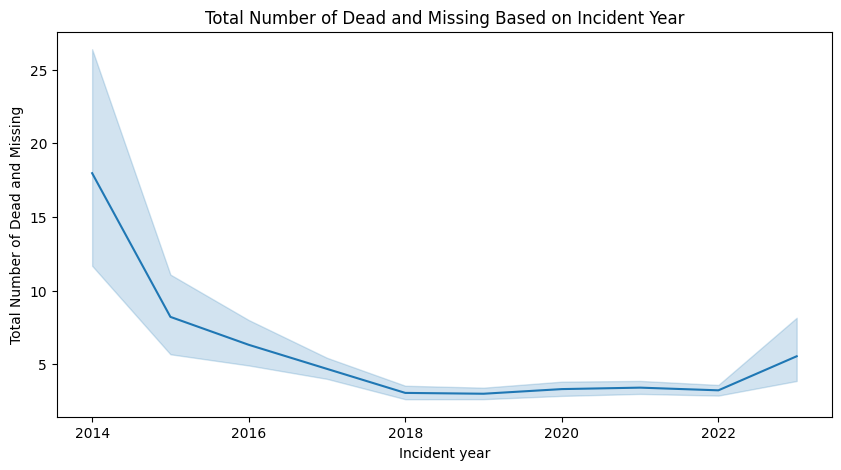

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

plt.figure(figsize=(10, 5))
plt.title('Total Number of Dead and Missing Based on Incident Year')
sns.lineplot(x="Incident year", y="Total Number of Dead and Missing", data=df)

<Axes: title={'center': 'Total Number of Dead and Missing Based on Regions of Incident'}, xlabel='Region of Incident', ylabel='Total Number of Dead and Missing'>

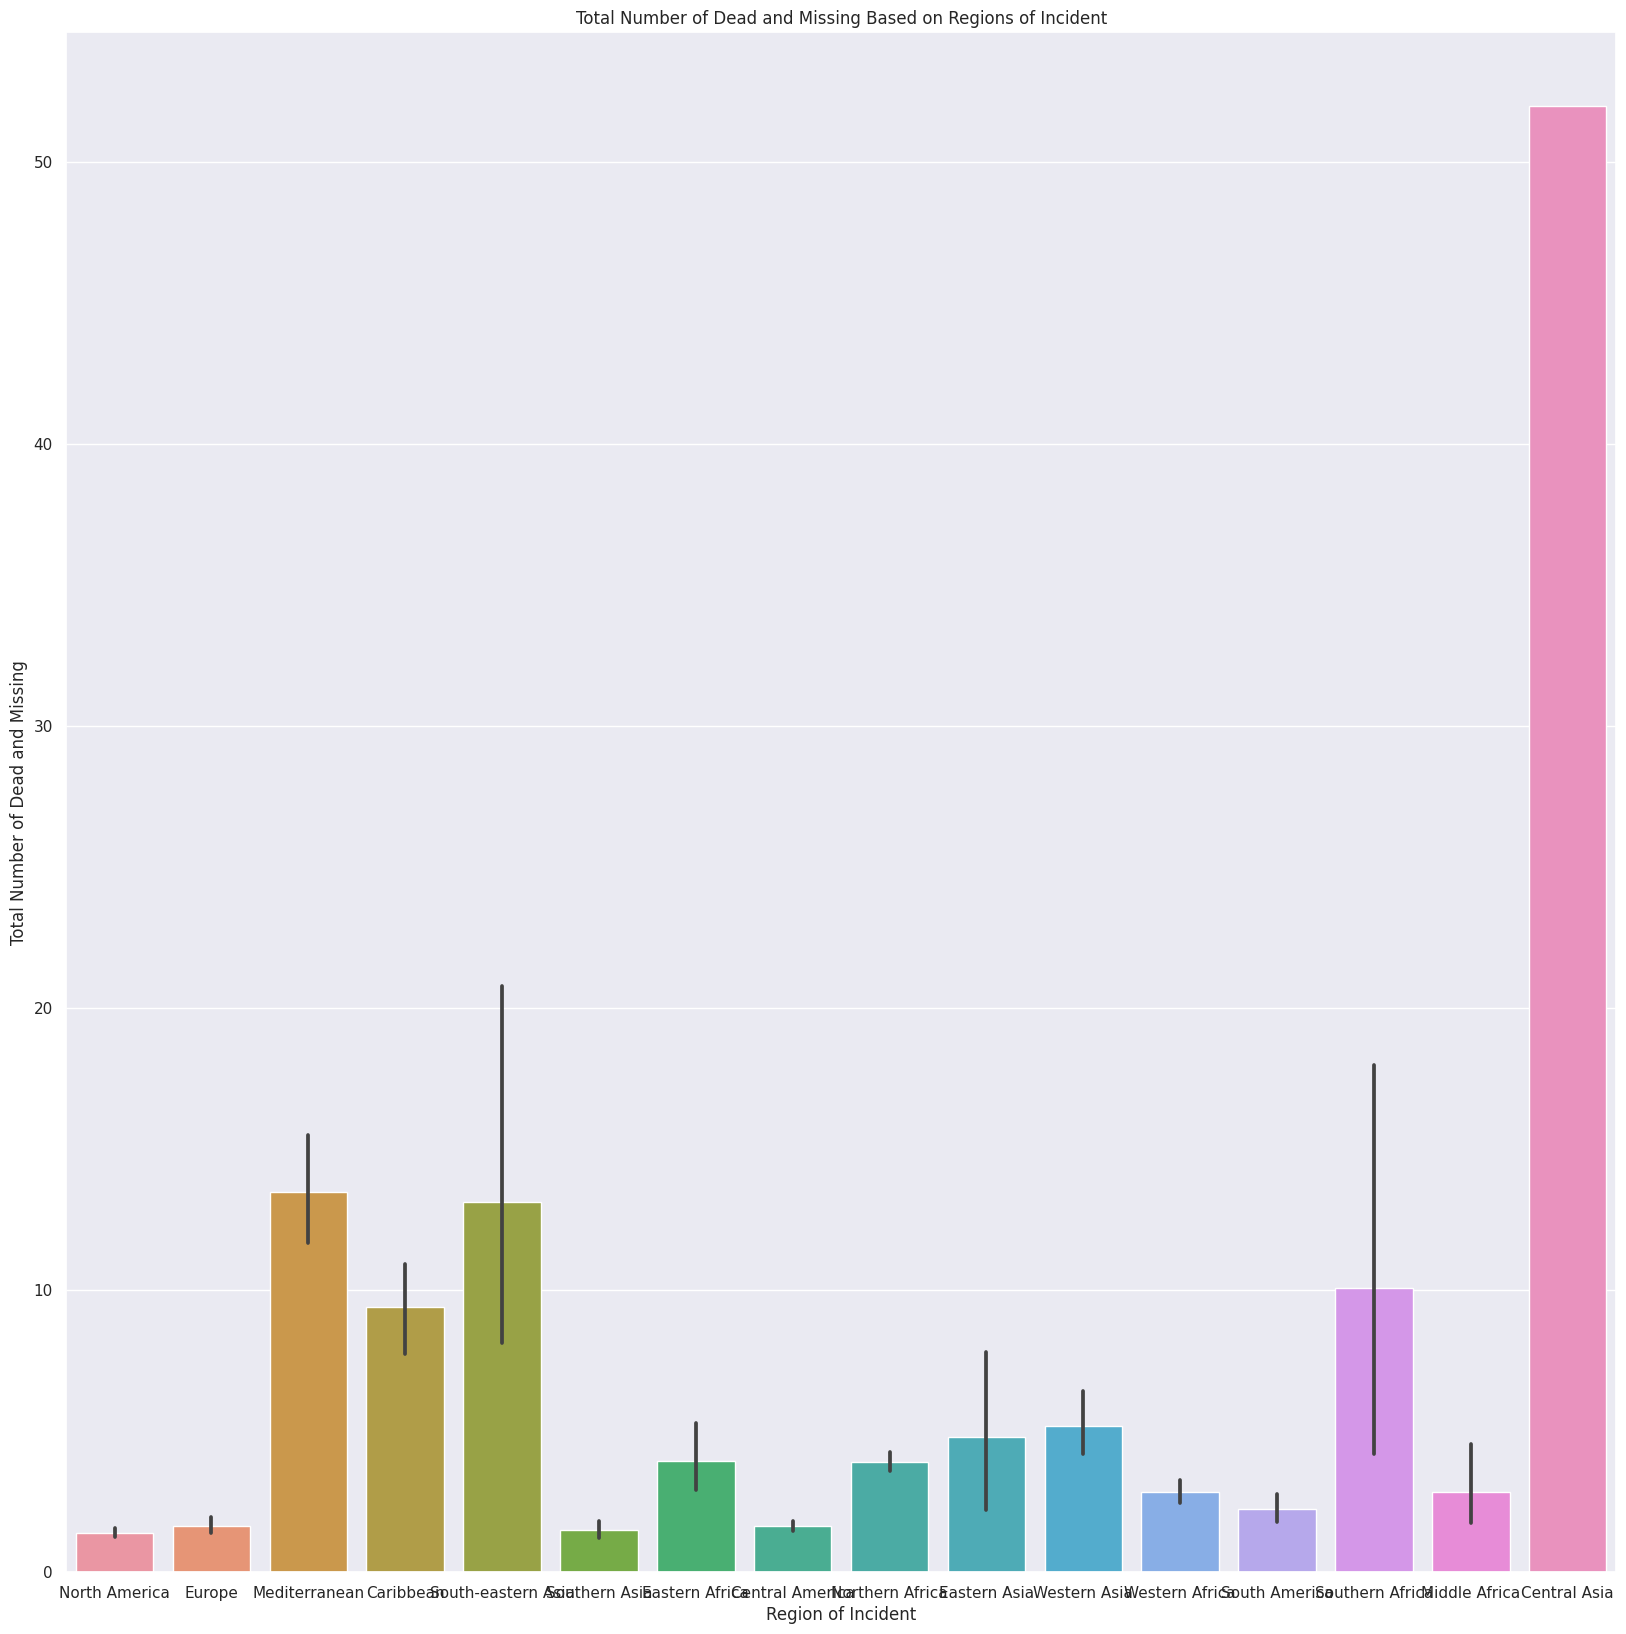

In [ ]:
sns.set_theme()

plt.figure(figsize=(20, 20))
plt.title('Total Number of Dead and Missing Based on Regions of Incident')
sns.barplot(x = df["Region of Incident"],
            y = df['Total Number of Dead and Missing'],
            data = df)

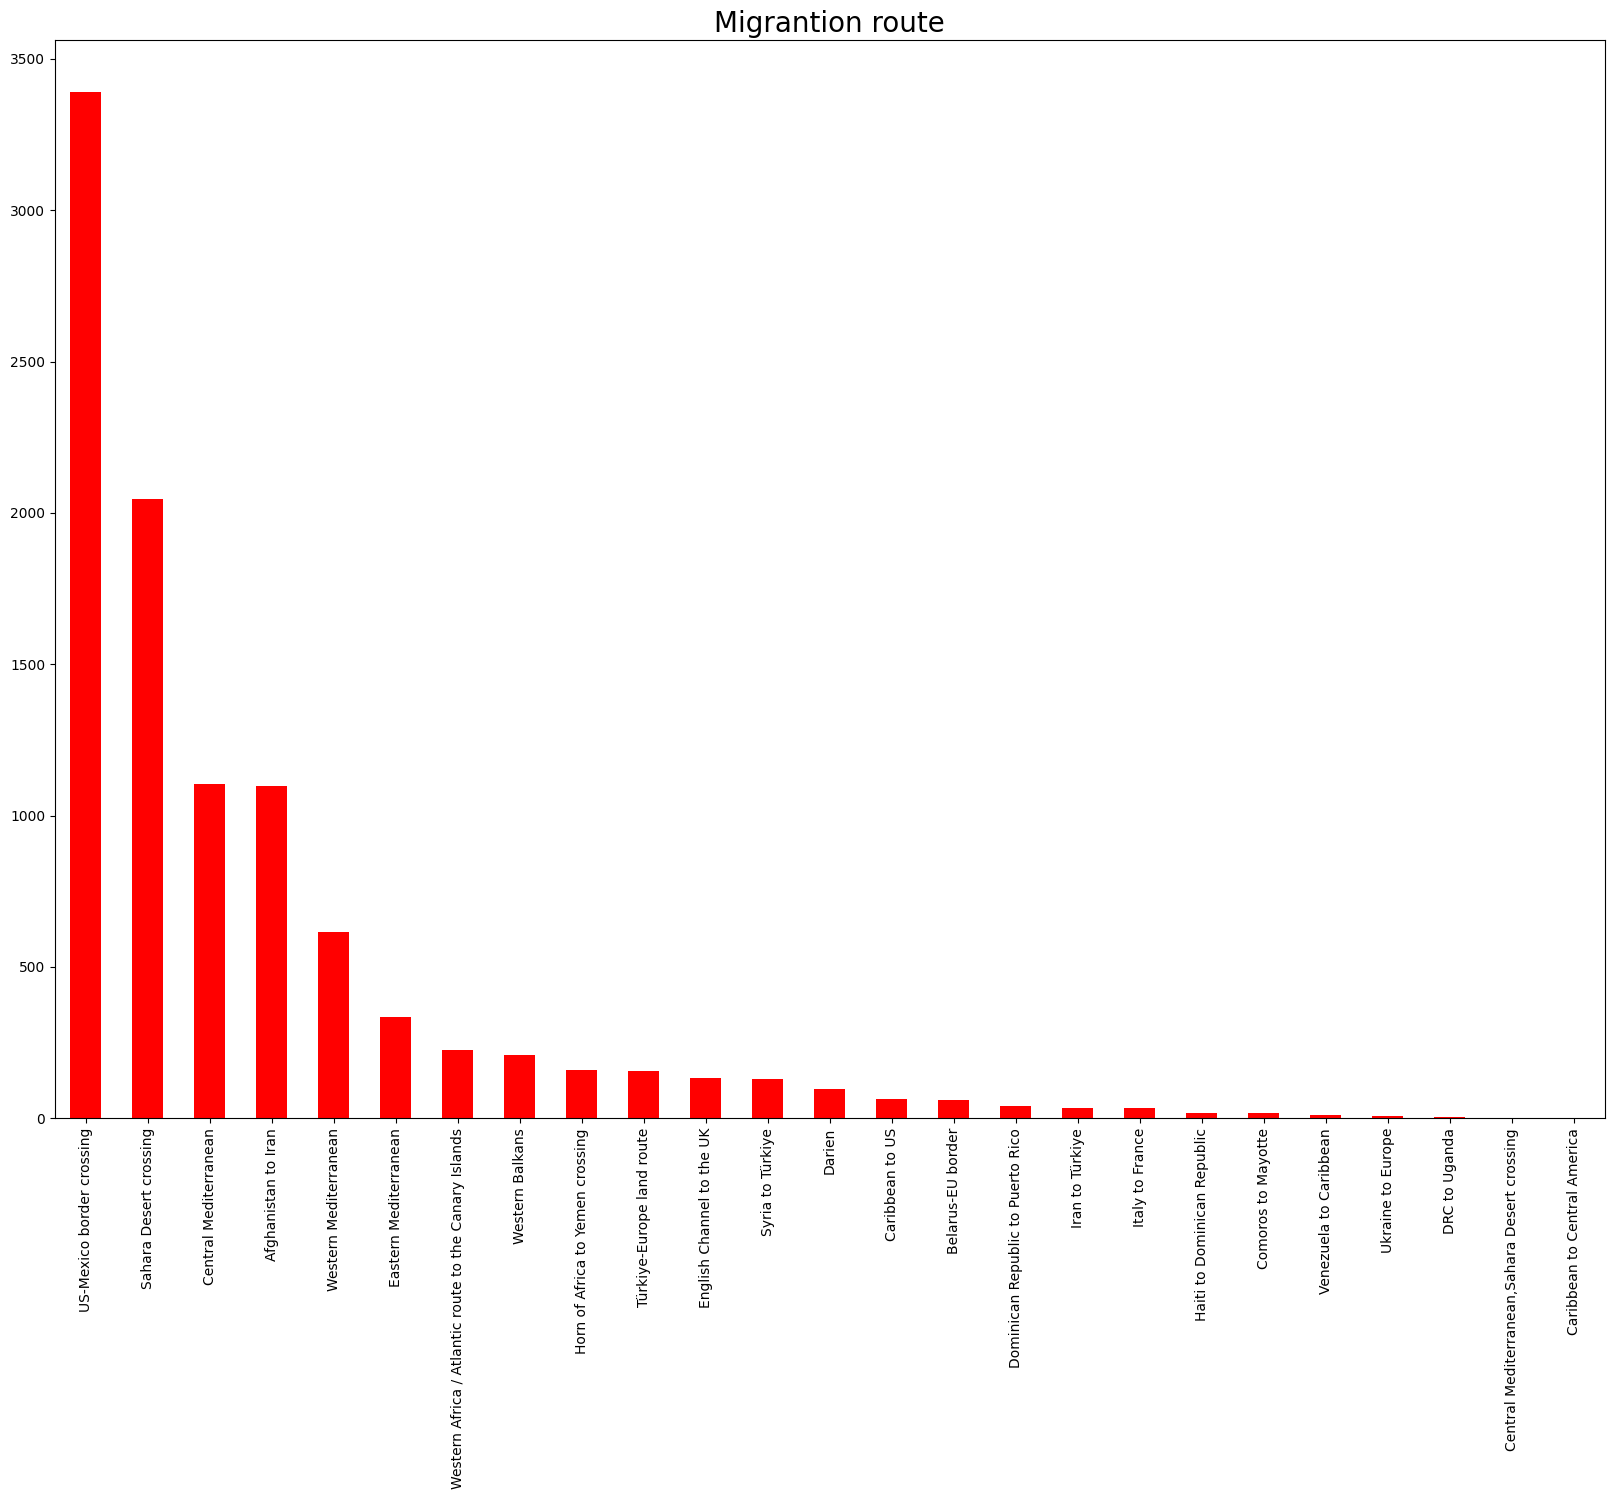

In [ ]:
fig = plt.figure(figsize=(20, 14))
df['Migration route'].value_counts().plot(kind='bar',
                                   color='r',
                                   align='center')
plt.title('Migration route', fontsize=20)
plt.show()

In [ ]:
databyYear = data.groupby(['year'])[['totMigrants', 'totSurvive', 'missingDead',
                                     'identify', 'notIdentify']].sum()
databyYear['year'] = databyYear.index

fig = databyYear.plot(x="year",
                      y=["totMigrants", "totSurvive", "missingDead", "identify", "notIdentify"],
                      kind="bar",
                      figsize=(15,8), align='center'
                     )
fig.set_title("Missing Migrants Statics per Year", pad=20, fontdict={'fontsize':24})
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Numbers", fontsize=15)
fig.legend(loc=1,fontsize=15)

In [ ]:
# Sum selected columns
selected_columns = ['Number of Females', 'Number of Males', 'Number of Children']
sum_selected_columns = df[selected_columns].sum()

print("Sum of selected columns:")
print(sum_selected_columns)

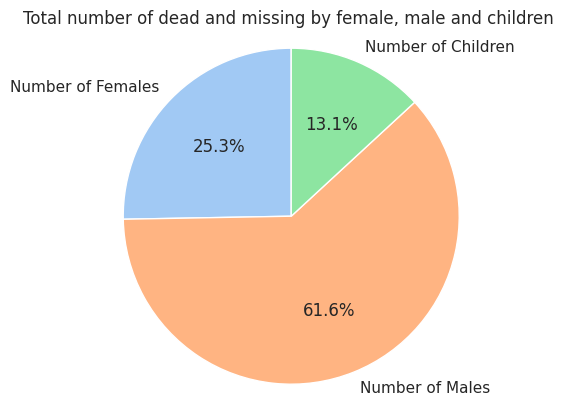

In [ ]:
import numpy
labels = ['Number of Females', 'Number of Males', 'Number of Children']
sizes = numpy.array([5968, 14531, 3100])

#def absolute_value(val):
#   a  = numpy.round(val/100.*sizes.sum(), 0)
#    return a

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax.axis('equal')
plt.title('Total number of dead and missing by female, male and children ')

plt.show()

In [ ]:
!pip install cartopy

In [ ]:
df[['Lat', 'Lon']] = df['Coordinates'].str.split(',', expand=True)
df[['Lat', 'Lon']] = df[['Lat', 'Lon']].apply(pd.to_numeric)

print("\nDataFrame after splitting coordinates:")
print(df)

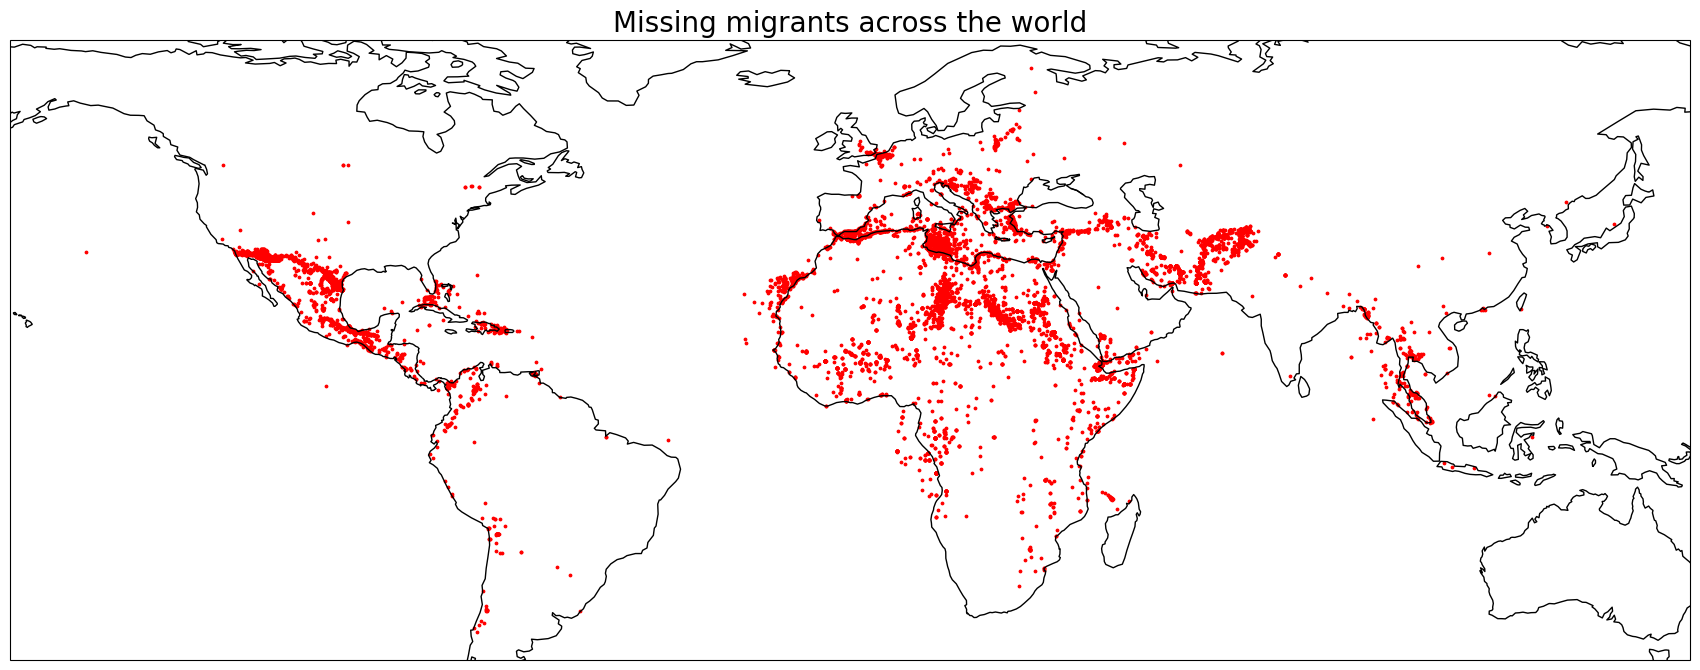

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


lat = df['Lat'].dropna().values
lon = df['Lon'].dropna().values

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([1.0, 1.0, 2.8, 2.8], projection=ccrs.PlateCarree())
ax.scatter(lon, lat, 3, marker='o', color='r', transform=ccrs.PlateCarree())
ax.coastlines()

ax.set_title('Missing migrants across the world', fontsize=20)
plt.show()

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap
import numpy as np


mean_lat = df['Lat'].mean()
mean_long = df['Lon'].mean()


base_map = folium.Map(location=[mean_lat, mean_long], zoom_start=3)
heatmap_data = df.groupby(['Lat', 'Lon'])['Total Number of Dead and Missing'].sum().reset_index()
heatmap_array = heatmap_data[['Lat', 'Lon', 'Total Number of Dead and Missing']].to_numpy()
heatmap_array = np.nan_to_num(heatmap_array)
HeatMap(data=heatmap_array, radius=8, max_zoom=13).add_to(base_map)
base_map

##Data Preparation
# <p>**Data Cleaning**</p>

---

* Data preparation steps
* Final data for modeling

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.shape

(12976, 19)

In [ ]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

In [ ]:
columns_to_remove = ['Incident Type', 'Region of Origin', 'Region of Incident', 'Country of Origin', 'Cause of Death', 'Migration route', 'Location of death', 'Information Source', 'Coordinates', 'UNSD Geographical Grouping']  # list all columns to remove
df.drop(columns=columns_to_remove, inplace=True)

In [ ]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.values

In [ ]:
df.drop(cat_cols,axis=1,inplace=True)
display(df)

,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
0,2014,1,1.0,0,1,0,0,1,0
1,2014,1,1.0,0,1,0,0,0,0
2,2014,1,1.0,0,1,0,0,0,0
3,2014,1,1.0,0,1,0,0,1,0
4,2014,1,1.0,0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...
13015,2023,7,4.0,0,4,0,0,4,0
13016,2023,7,2.0,0,2,0,0,2,0
13017,2023,7,13.0,0,13,6,0,0,0
13018,2023,7,6.0,0,6,48,0,0,0


In [ ]:
# Select only numeric columns for variance threshold
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Fit the VarianceThreshold selector to the numeric columns
selector.fit(df[numeric_columns])

# Get constant columns among numeric columns
constant_columns = [column for column in numeric_columns
                            if column not in numeric_columns[selector.get_support()]]

# Drop constant numeric columns
df.drop(columns=constant_columns, inplace=True)


In [ ]:
new_shape = df.shape

In [ ]:
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
final_shape = df.shape

In [ ]:
new_shape, constant_columns, final_shape

((12976, 8), [], (12976, 8))

In [ ]:
df.isna().sum()

Incident year                          0
Number of Dead                         0
Minimum Estimated Number of Missing    0
Total Number of Dead and Missing       0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
dtype: int64

# Modeling
## Time Series Forecasting


In [ ]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['Reported Month'] = df['Reported Month'].map(month_mapping)

In [ ]:
df_model = df.groupby(['Incident year', 'Reported Month'])['Total Number of Dead and Missing'].sum().reset_index()

print(df_model)

     Incident year  Reported Month  Total Number of Dead and Missing
0             2014               1                                28
1             2014               2                                64
2             2014               3                               330
3             2014               4                               106
4             2014               5                               461
..             ...             ...                               ...
110           2023               3                               454
111           2023               4                               625
112           2023               5                               248
113           2023               6                               805
114           2023               7                               290

[115 rows x 3 columns]


In [ ]:
import plotly.express as px

df_model_sort = df_model.sort_values(by=['Incident year', 'Reported Month'])

df_model_i = pd.date_range(start='2014-01-01', end='2023-07-01', freq='MS')
df_model_sort.set_index(df_model_i, inplace=True)

fig = px.line(df_model_sort, x=df_model_sort.index, y=["Total Number of Dead and Missing"],
              labels={"value": "Count"},
              title='Monthly Number of Dead and Missing',
              template='plotly_dark')
fig.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')

check_stationarity(df_model['Total Number of Dead and Missing'])

ADF Statistic: -1.7479335042477022
p-value: 0.4066001064351412
Non-Stationary


In [ ]:
# Differencing: Non-Stationary to Stationary
df_model['Total Number of Dead and Missing_diff'] = df_model['Total Number of Dead and Missing'].diff(1).iloc[1:]
df_model = df_model.dropna()

df_model.head()

,Incident year,Reported Month,Total Number of Dead and Missing,Total Number of Dead and Missing_diff
1,2014,2,64,36.0
2,2014,3,330,266.0
3,2014,4,106,-224.0
4,2014,5,461,355.0
5,2014,6,412,-49.0


In [ ]:
check_stationarity(df_model['Total Number of Dead and Missing_diff'])

ADF Statistic: -3.481377793830119
p-value: 0.00847843160050917
Stationary


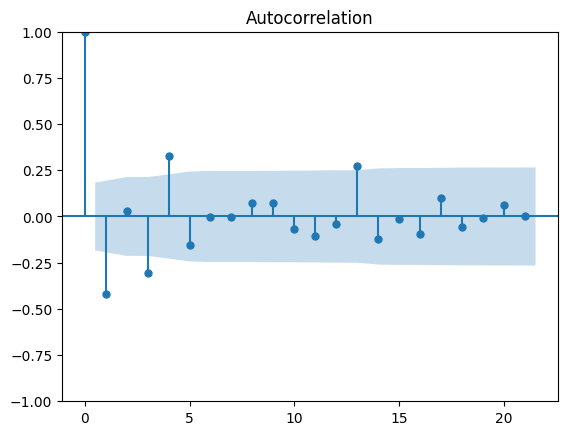

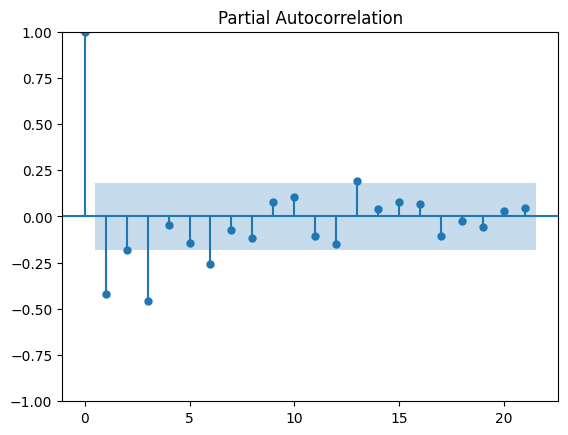

In [ ]:
# Use the differenced column for ACF and PACF
diff_series = df_model['Total Number of Dead and Missing_diff']

# Plot ACF and PACF
plot_acf(diff_series)
plot_pacf(diff_series)
plt.show()

In [ ]:
df_model['Date'] = pd.to_datetime(df_model['Incident year'].astype(str) + '-' + df_model['Reported Month'].astype(str) + '-01', format='%Y-%m-%d')
df_modeling = df_model[['Date', 'Total Number of Dead and Missing_diff']]
df_modeling.set_index('Date', inplace=True)

df_modeling.head()

,Total Number of Dead and Missing_diff
Date,
2014-02-01,36.0
2014-03-01,266.0
2014-04-01,-224.0
2014-05-01,355.0
2014-06-01,-49.0


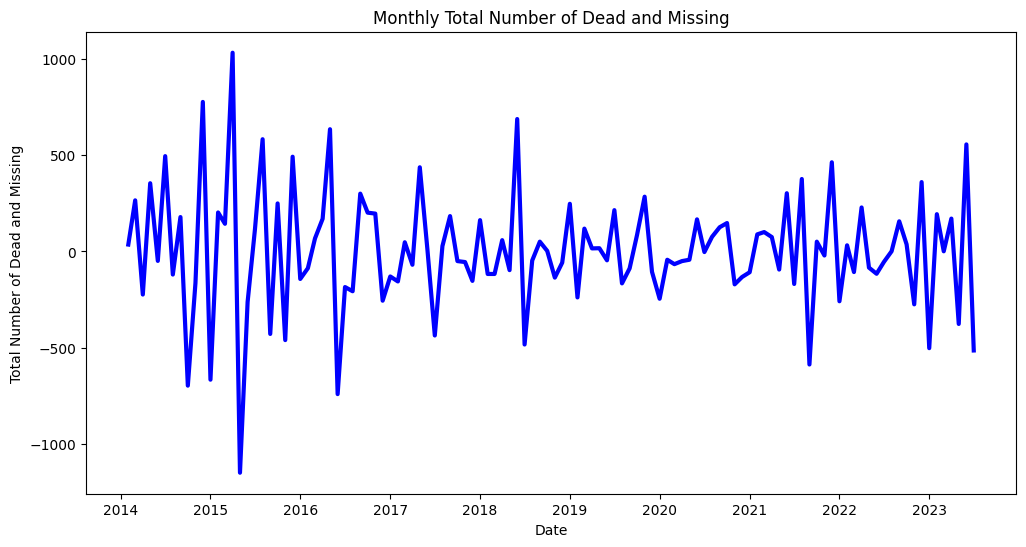

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_modeling['Total Number of Dead and Missing_diff'], linewidth=3,c='blue')
plt.title("Monthly Total Number of Dead and Missing")
plt.xlabel("Date")
plt.ylabel("Total Number of Dead and Missing")
plt.show()

In [ ]:
# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(df_modeling, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#Model Evaluation

In [ ]:
# Display the fitted model
print(results.summary())

                                         SARIMAX Results                                         
Dep. Variable:     Total Number of Dead and Missing_diff   No. Observations:                  114
Model:                    SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -729.604
Date:                                   Sun, 31 Dec 2023   AIC                           1469.207
Time:                                           09:46:27   BIC                           1482.283
Sample:                                       02-01-2014   HQIC                          1474.501
                                            - 07-01-2023                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4184      0.072     -5.846      0.000    

The SARIMAS results provide detailed information about the fitted Seasonal AutoRegressive Integrated Moving Average with eXogenous variable model.

Model Coefficients:

ar.L1 (AR Parameter): -0.4184

ma.L1 (MA Parameter): -1.0000

ar.S.L12 (Seasonal AR Parameter): 0.0845

ma.S.L12 (Seasonal MA Parameter): -0.9992

These coefficients represent the estimated parameters of the model. They indicate the impact of the corresponding terms on the dependent variable.
The p-value associated with the z-statistic. Low p-values indicate that the corresponding coefficient is statistically significant.


In [ ]:
# Generate Forecast
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

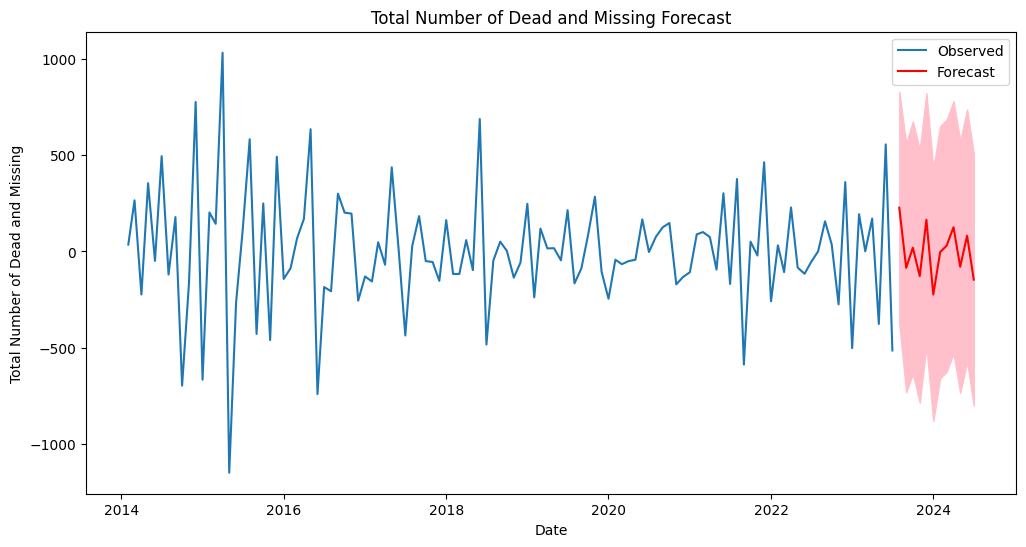

In [ ]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_modeling, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Total Number of Dead and Missing Forecast")
plt.xlabel("Date")
plt.ylabel("Total Number of Dead and Missing")
plt.legend()
plt.show()

In [ ]:
observed = df_modeling[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
rmse = np.sqrt(mse)

print(f'MAE: {mae}') # Mean Absolute Error
print(f'MSE: {mse}') # Mean Squared Error
print(f'RMSE: {rmse}') # Root Mean Squared Error

MAE: 209.94118499272648
MSE: 61623.77981572078
RMSE: 248.24137410133866


The metrics provided, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), are commonly used to evaluate the performance of a time series forecasting model.

A lower MAE, MSE, and RMSE are desirable, as they indicate smaller errors between predicted and actual values.

Comparing the three metrics:


* MAE gives an average absolute error, providing a straightforward interpretation.
* MSE penalizes larger errors more than MAE due to squaring.
* RMSE is the square root of MSE, making it more interpretable in the original unit of the target variable.





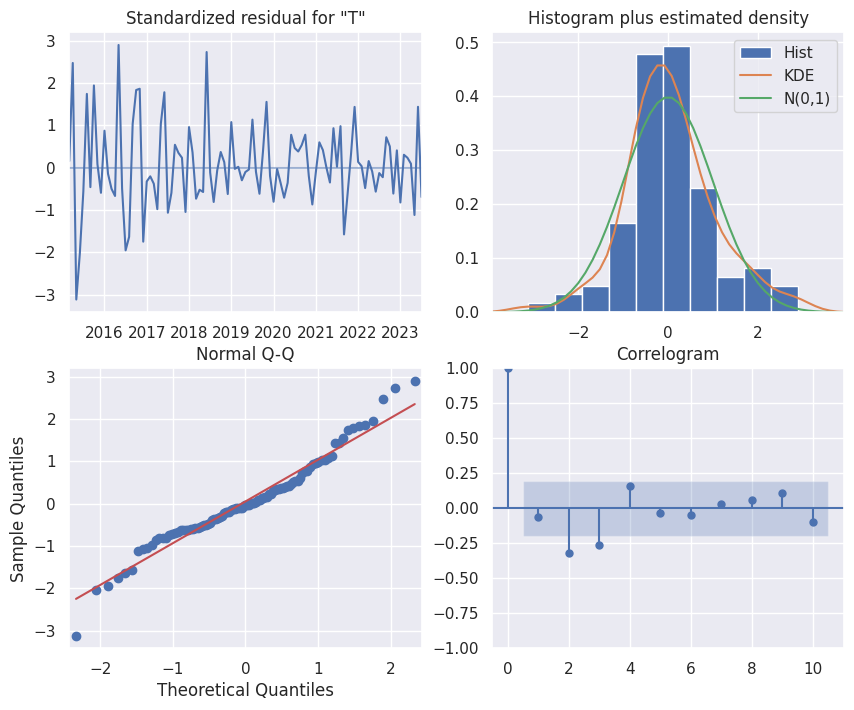

In [ ]:
plt.rcParams.update({'font.size': 12})
results.plot_diagnostics(figsize=(10, 8))
plt.show()

- *Standardized Residual for "T"*: There is no outlier in the model.

- *Histogram plus estimated density*: This normal distribution as the density plot having a bell-shaped curve, and the histogram bars resemble a bell curve. No outlier found.

- *Normal Q-Q*: The distribution of the data is approximately normal. The data exhibits a normal distribution.

- *Correlogram*: There are dots above and below the horizontal line in a correlogram, it indicates alternating positive and negative autocorrelations at different lags.

